In [26]:
import random
from PIL import Image, ImageDraw
import IPython

In [32]:
def find(i, parent):
    while i != parent[i]:
        i = parent[i]
    return i

In [33]:
def union(i, j, parent):
    i = find(i, parent)
    j = find(j, parent)
    parent[j] = i

In [34]:
def make_conf(L, p):
    parent = [i for i in range(L * L)]
    for iy in range(L-1):
        for ix in range(L-1):
            i = ix + iy * L
            j = ix+1 + iy * L
            if random.random() < p:
                union(i, j, parent)
            j = ix + (iy+1) * L
            if random.random() < p:
                union(i, j, parent)
    return parent

In [35]:
def show_image(parent, L):
    size = 512
    s = size // L
    im = Image.new("RGB", (size, size), (255, 255, 255))
    colors = []
    for _ in range(L*L):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        colors.append((r, g, b))
    draw = ImageDraw.Draw(im)
    for iy in range(L):
        for ix in range(L):
            i = ix + iy * L
            i = find(i, parent)
            c = colors[i]
            draw.rectangle((ix*s, iy*s, ix*s+s, iy*s+s), fill=c)
    im.save("test.png")

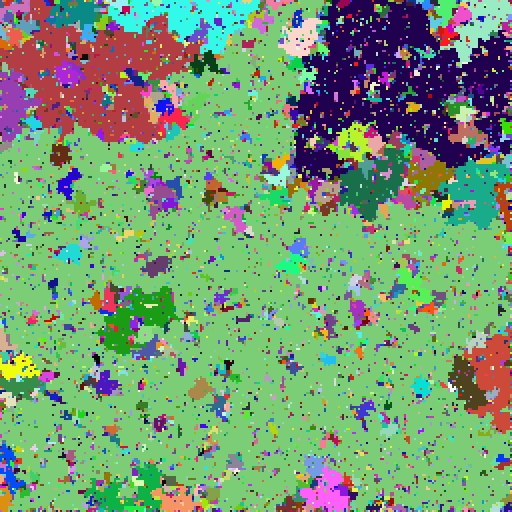

In [37]:
L = 256
p = 0.50
sites = make_conf(L, p)
show_image(sites, L)
IPython.display.Image("test.png")